In [1]:

import pandas as pd

web_data = pd.read_json( r'C:\Git_Repo\Radical_Project\radmap\radmap\public\data\data_update.json')
web_data.head( 3 )

c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,Number,Location,Event Type,Event Description,Links,Country,address,lat,lon,NAME,uid,Program Name,Date,Agents,Approach,Scale,Targets,source,Region,Region Info
0,0,Turkish consulate Salzburg,Ethno-Nationalist,Suspected Kurdistan Workers Party (PKK) activi...,None,Austria,"Strubergasse 9, 5020 Salzburg, Austria",47.809089,13.033605,Austria,tuvbsovw,None,None,None,None,None,None,radical,Salzburg,Salzburg is a state (Land) of the modern Repub...
1,1,Kurdish Cultural Institute of Vienna,Ethno-Nationalist,Unknown arsonists threw several Molotov cockta...,None,Austria,"Schönbrunner Str. 213, Büro 308, 1120 Wien, Au...",48.184325,16.334930,Austria,rbwzxcht,None,None,None,None,None,None,radical,Vienna,"Vienna is the capital, largest city, and one o..."
2,2,Vienna,Ethno-Nationalist,Turkish nationalists attacked Kurdish activist...,None,Austria,"Reumannpl. 23, 1100 Wien, Austria",48.174291,16.378751,Austria,ogueqkrt,None,None,None,None,None,None,radical,Vienna,"Vienna is the capital, largest city, and one o..."


In [2]:
rad_corr = pd.read_excel( r"C:\Git_Repo\Radical_Project\DATA\radicalization corrections.xlsx")
rad_corr.head( 3 )

,Number,Location,Region,Event Type,Event Description,NAME,address,Links
0,22,U.S. embassy in Sarajevo.,Sarajevo Canton,Jihadist Terror,Attack on U.S. embassy in Sarajevo was a messa...,Bosnia and Herzegovina,"Robert C. Frasure St 1, Sarajevo 71000, Bosnia...",NaN
1,26,Višegrad,Republic of Srpska,Right Wing Extremism,With the aim of keeping alive and promoting th...,Bosnia and Herzegovina,"Most Mehmed Paše Sokolovića, Višegrad, Bosnia ...",NaN
2,79,Kassel,"Kassel, Hessen",Right Wing Extremism,Assassination of the politician Walter Lübcke ...,Germany,"Kassel, Kassel, Federal state of Hessen, Germany",Murder of Walter Lübcke - Wikipedia


In [3]:
for i,r in rad_corr.iterrows():
    for column in rad_corr.columns:

        # print( web_data.loc[ (web_data[ 'Number' ] == r['Number'] ) & (web_data['source']=='radical'), column ] )
        web_data.loc[ (web_data[ 'Number' ] == r['Number'] ) & (web_data['source']=='radical'), column ] = r[ column ]


web_data[ (web_data['source']=='radical') & (web_data['Number'].isin(rad_corr['Number'].unique()) ) ].head()

,Number,Location,Event Type,Event Description,Links,Country,address,lat,lon,NAME,uid,Program Name,Date,Agents,Approach,Scale,Targets,source,Region,Region Info
22,22,U.S. embassy in Sarajevo.,Jihadist Terror,Attack on U.S. embassy in Sarajevo was a messa...,NaN,Bosnia and Herzegovina,"Robert C. Frasure St 1, Sarajevo 71000, Bosnia...",43.85670,18.40036,Bosnia and Herzegovina,jquqhtfg,None,None,None,None,None,None,radical,Sarajevo Canton,"The Sarajevo Canton, is one of 10 cantons of ..."
26,26,Višegrad,Right Wing Extremism,With the aim of keeping alive and promoting th...,NaN,Bosnia and Herzegovina,"Most Mehmed Paše Sokolovića, Višegrad, Bosnia ...",43.78322,19.28721,Bosnia and Herzegovina,lxalqahi,None,None,None,None,None,None,radical,Republic of Srpska,Republika Srpska is one of the two entities of...
78,79,Kassel,Right Wing Extremism,Assassination of the politician Walter Lübcke ...,Murder of Walter Lübcke - Wikipedia,Germany,"Kassel, Kassel, Federal state of Hessen, Germany",51.31853,9.51183,Germany,rgagonwa,None,None,None,None,None,None,radical,"Kassel, Hessen",Hesse is a state in Germany. Its capital city ...
102,103,Baghdad,Ethno-Sectarian,"The President of the Governing Council, Ezzedi...",Ezzedine Salim - Wikipedia,Iraq,"Arbataash Tamuz Street, Baghdad 10011, Iraq Iraq",33.36549,44.41625,Iraq,fgbngvxk,None,None,None,None,None,None,radical,Baghdad,Erbil Governorate is a governorate in the Kurd...
119,120,Khazna,Ethno-Sectarian,"The town of Khazna, in the Erbil Governorate, ...",Truck Bombs Turn Iraqi Village Near Mosul Into...,Iraq,"Khazna, Nineveh Plains, Nineveh Governorate, N...",36.53789,41.55821,Iraq,tcbyjxqg,None,None,None,None,None,None,radical,Erbil Governorate,Nineveh Governorate is a governorate in northe...


In [4]:
derad_corr = pd.read_excel( r"C:\Git_Repo\Radical_Project\DATA\Deradicalization Corrections.xlsx" )
derad_corr.head( 3 )

,Number,Program Name,Date,Agents,Approach,Scale,Targets,Location,Region,Event Type,Event Description,NAME,address,Links
0,15,Citizens Against Terrorism,2017 - 2020,"PRONI Centre for youth development, Youth Coun...","Civic Education, Awareness Raising",Regional,"Youth Workers, Youth",U.S. embassy in Sarajevo.,Sarajevo Canton,Jihadist Terror,Attack on U.S. embassy in Sarajevo was a messa...,"Bosnia , Herzegovina","Robert C. Frasure St 1, Sarajevo 71000, Bosnia...",NaN
1,89,"Various coordination programs , information ex...",2001,Ministry of Foreign Affairs - Department of Co...,Public Policy,"International, Regional","Regional, İnternational Organisations","Al- Balad, north of Baghdad",Baghdad,Jihadist Terror,100 people were killed in the popular city (Al...,Iraq,"Al- Balad, Baghdad, Iraq",http://edition.cnn.com/2005/WORLD/meast/09/29/...
2,138,Svet za odziv na sovražni in diskriminatorni g...,2015 - 2017 \n,Mirovni Inštitut (Peace Institute) \n,"Educative, Awareness Raising",National,General Public,"Sodček bar, Trubarjeva cesta",Ljubljana,Right Wing Extremism,Violent racist attack by skinheads against TV ...,Slovenia,"Linhartov trg 8, 4240 Radovljica, Slovenia",https://www.mladina.si/93704/)


In [5]:

for i,r in derad_corr.iterrows():
    for column in derad_corr.columns:
        web_data.loc[ (web_data[ 'Number' ] == r['Number'] ) & (web_data['source']=='deradical'), column ] = r[ column ]

web_data[ (web_data['source']=='deradical') & (web_data['Number'].isin(derad_corr['Number'].unique()) ) ].head()

,Number,Location,Event Type,Event Description,Links,Country,address,lat,lon,NAME,uid,Program Name,Date,Agents,Approach,Scale,Targets,source,Region,Region Info
273,15,U.S. embassy in Sarajevo.,Jihadist Terror,Attack on U.S. embassy in Sarajevo was a messa...,NaN,Bosnia and Herzegovina,"Robert C. Frasure St 1, Sarajevo 71000, Bosnia...",43.856700,18.400360,"Bosnia , Herzegovina",itlygsug,Citizens Against Terrorism,2017 - 2020,"PRONI Centre for youth development, Youth Coun...","Civic Education, Awareness Raising",Regional,"Youth Workers, Youth",deradical,Sarajevo Canton,"The Sarajevo Canton, is one of 10 cantons of t..."
347,89,"Al- Balad, north of Baghdad",Jihadist Terror,100 people were killed in the popular city (Al...,http://edition.cnn.com/2005/WORLD/meast/09/29/...,Iraq,"Al- Balad, Baghdad, Iraq",33.342100,44.393070,Iraq,hzchscjo,"Various coordination programs , information ex...",2001,Ministry of Foreign Affairs - Department of Co...,Public Policy,"International, Regional","Regional, İnternational Organisations",deradical,Baghdad,Baghdad Governorate is the capital governorate...
396,138,"Sodček bar, Trubarjeva cesta",Right Wing Extremism,Violent racist attack by skinheads against TV ...,https://www.mladina.si/93704/),Slovenia,"Linhartov trg 8, 4240 Radovljica, Slovenia",46.341383,14.174579,Slovenia,cyxywopv,Svet za odziv na sovražni in diskriminatorni g...,2015 - 2017 \n,Mirovni Inštitut (Peace Institute) \n,"Educative, Awareness Raising",National,General Public,deradical,Ljubljana,The City Municipality of Ljubljana is one of t...
401,143,Ljubljana,Anti-Roma,Resettlement of the Roma family Strojan. Lynch...,https://www.nytimes.com/2006/11/27/world/europ...,Slovenia,"Sostro District, Ljubljana, Slovenia",46.088050,14.644630,Slovenia,fgdwrqml,In Media Res (vezjak.si) \n,2005- present,Private blog by scholar Boris Vezjak,"Educational, Awareness Raising",National,General Public,deradical,Ljubljana,The City Municipality of Ljubljana is one of t...
403,145,Radiotelevizija Slovenija,Anti-Roma,Piramida TV show with Zmago Jelinčič (SNP). Ed...,https://www.youtube.com/watch?v=yvz4_QIjeEw,Slovenia,"Radiotelevizija Slovenija, Kolodvorska ulica 2...",46.054332,14.509135,Slovenia,oidyipoo,Odklikni (odklikni.si) \n,2014 - present,"Ministry of Labour, Family, Social Affairs and...","Educational, Awareness Raising, Documentation,...",National,General Public,deradical,Ljubljana,The City Municipality of Ljubljana is one of t...


In [6]:
rad_loc = pd.read_excel( 
    r"C:\Git_Repo\Radical_Project\DATA\Location_Corrections_V2.xlsx" ,
    sheet_name='Radicalization Corrections'  )

rad_loc = rad_loc[['source','Number','lat','lon']]
rad_loc.head( 3 )

,source,Number,lat,lon
0,radical,22,43.856610,18.400392
1,radical,26,43.782316,19.288145
2,radical,79,51.362744,9.454771


In [7]:

for i,r in rad_loc.iterrows():
    for column in rad_loc.columns:

        web_data.loc[ (web_data[ 'Number' ] == r['Number'] ) & (web_data['source']=='deradical'), column ] = r[ column ]


web_data[ (web_data['source']=='deradical') & (web_data['Number'].isin(derad_corr['Number'].unique()) ) ].head()


,Number,Location,Event Type,Event Description,Links,Country,address,lat,lon,NAME,uid,Program Name,Date,Agents,Approach,Scale,Targets,source,Region,Region Info
273,15,U.S. embassy in Sarajevo.,Jihadist Terror,Attack on U.S. embassy in Sarajevo was a messa...,NaN,Bosnia and Herzegovina,"Robert C. Frasure St 1, Sarajevo 71000, Bosnia...",43.856700,18.400360,"Bosnia , Herzegovina",itlygsug,Citizens Against Terrorism,2017 - 2020,"PRONI Centre for youth development, Youth Coun...","Civic Education, Awareness Raising",Regional,"Youth Workers, Youth",deradical,Sarajevo Canton,"The Sarajevo Canton, is one of 10 cantons of t..."
347,89,"Al- Balad, north of Baghdad",Jihadist Terror,100 people were killed in the popular city (Al...,http://edition.cnn.com/2005/WORLD/meast/09/29/...,Iraq,"Al- Balad, Baghdad, Iraq",33.342100,44.393070,Iraq,hzchscjo,"Various coordination programs , information ex...",2001,Ministry of Foreign Affairs - Department of Co...,Public Policy,"International, Regional","Regional, İnternational Organisations",deradical,Baghdad,Baghdad Governorate is the capital governorate...
396,138,"Sodček bar, Trubarjeva cesta",Right Wing Extremism,Violent racist attack by skinheads against TV ...,https://www.mladina.si/93704/),Slovenia,"Linhartov trg 8, 4240 Radovljica, Slovenia",46.341383,14.174579,Slovenia,cyxywopv,Svet za odziv na sovražni in diskriminatorni g...,2015 - 2017 \n,Mirovni Inštitut (Peace Institute) \n,"Educative, Awareness Raising",National,General Public,deradical,Ljubljana,The City Municipality of Ljubljana is one of t...
401,143,Ljubljana,Anti-Roma,Resettlement of the Roma family Strojan. Lynch...,https://www.nytimes.com/2006/11/27/world/europ...,Slovenia,"Sostro District, Ljubljana, Slovenia",46.088050,14.644630,Slovenia,fgdwrqml,In Media Res (vezjak.si) \n,2005- present,Private blog by scholar Boris Vezjak,"Educational, Awareness Raising",National,General Public,deradical,Ljubljana,The City Municipality of Ljubljana is one of t...
403,145,Radiotelevizija Slovenija,Anti-Roma,Piramida TV show with Zmago Jelinčič (SNP). Ed...,https://www.youtube.com/watch?v=yvz4_QIjeEw,Slovenia,"Radiotelevizija Slovenija, Kolodvorska ulica 2...",46.054332,14.509135,Slovenia,oidyipoo,Odklikni (odklikni.si) \n,2014 - present,"Ministry of Labour, Family, Social Affairs and...","Educational, Awareness Raising, Documentation,...",National,General Public,deradical,Ljubljana,The City Municipality of Ljubljana is one of t...


In [8]:
derad_loc = pd.read_excel( 
    r"C:\Git_Repo\Radical_Project\DATA\Location_Corrections_V2.xlsx" ,
    sheet_name='Deradicalization Corrections'  )

derad_loc = derad_loc[['source','Number','lat','lon']]
derad_loc.head( 3 )

,source,Number,lat,lon
0,deradical,15,43.856641,18.400414
1,deradical,89,33.347126,44.491210
2,deradical,138,46.341353,14.174599


In [9]:

for i,r in derad_loc.iterrows():
    for column in derad_loc.columns:

        web_data.loc[ (web_data[ 'Number' ] == r['Number'] ) & (web_data['source']=='deradical'), column ] = r[ column ]


web_data[ (web_data['source']=='deradical') & (web_data['Number'].isin(derad_corr['Number'].unique()) ) ].head()


,Number,Location,Event Type,Event Description,Links,Country,address,lat,lon,NAME,uid,Program Name,Date,Agents,Approach,Scale,Targets,source,Region,Region Info
273,15,U.S. embassy in Sarajevo.,Jihadist Terror,Attack on U.S. embassy in Sarajevo was a messa...,NaN,Bosnia and Herzegovina,"Robert C. Frasure St 1, Sarajevo 71000, Bosnia...",43.856641,18.400414,"Bosnia , Herzegovina",itlygsug,Citizens Against Terrorism,2017 - 2020,"PRONI Centre for youth development, Youth Coun...","Civic Education, Awareness Raising",Regional,"Youth Workers, Youth",deradical,Sarajevo Canton,"The Sarajevo Canton, is one of 10 cantons of t..."
347,89,"Al- Balad, north of Baghdad",Jihadist Terror,100 people were killed in the popular city (Al...,http://edition.cnn.com/2005/WORLD/meast/09/29/...,Iraq,"Al- Balad, Baghdad, Iraq",33.347126,44.491210,Iraq,hzchscjo,"Various coordination programs , information ex...",2001,Ministry of Foreign Affairs - Department of Co...,Public Policy,"International, Regional","Regional, İnternational Organisations",deradical,Baghdad,Baghdad Governorate is the capital governorate...
396,138,"Sodček bar, Trubarjeva cesta",Right Wing Extremism,Violent racist attack by skinheads against TV ...,https://www.mladina.si/93704/),Slovenia,"Linhartov trg 8, 4240 Radovljica, Slovenia",46.341353,14.174599,Slovenia,cyxywopv,Svet za odziv na sovražni in diskriminatorni g...,2015 - 2017 \n,Mirovni Inštitut (Peace Institute) \n,"Educative, Awareness Raising",National,General Public,deradical,Ljubljana,The City Municipality of Ljubljana is one of t...
401,143,Ljubljana,Anti-Roma,Resettlement of the Roma family Strojan. Lynch...,https://www.nytimes.com/2006/11/27/world/europ...,Slovenia,"Sostro District, Ljubljana, Slovenia",46.033235,14.672589,Slovenia,fgdwrqml,In Media Res (vezjak.si) \n,2005- present,Private blog by scholar Boris Vezjak,"Educational, Awareness Raising",National,General Public,deradical,Ljubljana,The City Municipality of Ljubljana is one of t...
403,145,Radiotelevizija Slovenija,Anti-Roma,Piramida TV show with Zmago Jelinčič (SNP). Ed...,https://www.youtube.com/watch?v=yvz4_QIjeEw,Slovenia,"Radiotelevizija Slovenija, Kolodvorska ulica 2...",46.054459,14.509074,Slovenia,oidyipoo,Odklikni (odklikni.si) \n,2014 - present,"Ministry of Labour, Family, Social Affairs and...","Educational, Awareness Raising, Documentation,...",National,General Public,deradical,Ljubljana,The City Municipality of Ljubljana is one of t...


In [14]:
path = r'C:\Git_Repo\Radical_Project\DATA\data-update-4.xls'
last_corrections = pd.read_excel( path , sheet_name='data update 3 json' )

last_corrections.columns = [i.replace('_ - _ - ','') for i in last_corrections.columns]

last_corrections

,Number,Location,Event Type,Event Description,Links,Country,address,lat,lon,NAME,uid,Program Name,Date,Agents,Approach,Scale,Targets,source,Region,Region Info
0,0,Turkish consulate Salzburg,Ethno-Nationalist,Suspected Kurdistan Workers Party (PKK) activi...,NaN,Austria,"Strubergasse 9, 5020 Salzburg, Austria",47.809089,13.033605,Austria,tuvbsovw,NaN,NaN,NaN,NaN,NaN,NaN,radical,Salzburg,Salzburg is a state (Land) of the modern Repub...
1,1,Kurdish Cultural Institute of Vienna,Ethno-Nationalist,Unknown arsonists threw several Molotov cockta...,NaN,Austria,"Schönbrunner Str. 213, Büro 308, 1120 Wien, Au...",48.184325,16.334930,Austria,rbwzxcht,NaN,NaN,NaN,NaN,NaN,NaN,radical,Vienna,"Vienna is the capital, largest city, and one o..."
2,2,Vienna,Ethno-Nationalist,Turkish nationalists attacked Kurdish activist...,NaN,Austria,"Reumannpl. 23, 1100 Wien, Austria",48.174291,16.378751,Austria,ogueqkrt,NaN,NaN,NaN,NaN,NaN,NaN,radical,Vienna,"Vienna is the capital, largest city, and one o..."
3,3,Novartis CEO's hunting lodge,Left Wing Extremism,Assailants set fire to the hunting lodge of t...,NaN,Austria,"Bach, Tyrol, Austria",47.270430,10.403720,Austria,qqpnbmue,NaN,NaN,NaN,NaN,NaN,NaN,radical,"Bach, Tyrol",Tyrol is a state (Land) in western Austria. Wi...
4,4,Wiener Ballsaison,Left Wing Extremism,The Akademikerball (academic ball) is the repl...,NaN,Austria,"Hofburg Wien, 1010, Vienna 1, Vienna, Austria",48.207740,16.366540,Austria,eaimujnt,NaN,NaN,NaN,NaN,NaN,NaN,radical,Vienna,"Vienna is the capital, largest city, and one o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,160,Green Lane Mosque,Islamaphobic,Pavlo Lapshyn. Ukrainian supremacist serving m...,NaN,United Kingdom,"20 Green Ln, Small Heath, Birmingham B9 5DB, UK",52.473080,-1.863210,United Kingdom,qoqvduji,Hope Not Hate,2004 - present,NGO – Hope not Hate,"Educational, Legal Support",National,Focused on right-wing extremism but also offer...,deradical,Birmingham,West Midlands is a metropolitan county in the ...
419,161,Walsal Mosque,Islamaphobic,Pavlo Lapshyn. Ukrainian supremacist serving m...,NaN,United Kingdom,"183 Prince Street, Walsall, Birmingham, West M...",52.575938,-2.001145,United Kingdom,qlxzalwh,Hope Not Hate,2004 - present,NGO – Hope not Hate,"Educational, Legal Support",National,Focused on right-wing extremism but also offer...,deradical,Walsal,West Midlands is a metropolitan county in the ...
420,162,Wolverhampton Central Mosque,Islamaphobic,Pavlo Lapshyn. Ukrainian supremacist serving m...,NaN,United Kingdom,"197 Waterloo Rd, Wolverhampton WV1 4RA, UK",52.596204,-2.129416,United Kingdom,babbtxym,Hope Not Hate,2004 - present,NGO – Hope not Hate,"Educational, Legal Support",National,Focused on right-wing extremism but also offer...,deradical,Wolverhampton,West Midlands is a metropolitan county in the ...
421,163,Tipton Mosque,Islamaphobic,Pavlo Lapshyn. Ukrainian supremacist serving m...,NaN,United Kingdom,"8 Peel Street, Tipton, Dudley, West Midlands, ...",52.523514,-2.056742,United Kingdom,nmiiquft,Hope Not Hate,2004 - present,NGO – Hope not Hate,"Educational, Legal Support",National,Focused on right-wing extremism but also offer...,deradical,Tipton,West Midlands is a metropolitan county in the ...


In [15]:
last_corrections.to_json(
    r'C:\Git_Repo\Radical_Project\radmap\radmap\public\data\data_update_4.json',
    orient='records',
)

### Additional Data & Photos

In [2]:
import pandas as pd
data = pd.read_json( r'C:\Git_Repo\Radical_Project\radmap\radmap\public\data\data_update_4.json' )
data.tail( 3 )

c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,Number,Location,Event Type,Event Description,Links,Country,address,lat,lon,NAME,uid,Program Name,Date,Agents,Approach,Scale,Targets,source,Region,Region Info
420,162,Wolverhampton Central Mosque,Islamaphobic,Pavlo Lapshyn. Ukrainian supremacist serving m...,None,United Kingdom,"197 Waterloo Rd, Wolverhampton WV1 4RA, UK",52.596204,-2.129416,United Kingdom,babbtxym,Hope Not Hate,2004 - present,NGO – Hope not Hate,"Educational, Legal Support",National,Focused on right-wing extremism but also offer...,deradical,Wolverhampton,West Midlands is a metropolitan county in the ...
421,163,Tipton Mosque,Islamaphobic,Pavlo Lapshyn. Ukrainian supremacist serving m...,None,United Kingdom,"8 Peel Street, Tipton, Dudley, West Midlands, ...",52.523514,-2.056742,United Kingdom,nmiiquft,Hope Not Hate,2004 - present,NGO – Hope not Hate,"Educational, Legal Support",National,Focused on right-wing extremism but also offer...,deradical,Tipton,West Midlands is a metropolitan county in the ...
422,164,Royal Artillery Barracks,Jihadi Terrorism,"Murder of Lee Rigby. Two Muslim converts, one ...",None,United Kingdom,"Repository Rd, London SE18 4BH, UK",51.483384,0.056421,United Kingdom,djlamvaw,The Channel Programme,2017 - present,Home Office,Support,National,Focused on right-wing extremists and those inv...,deradical,Greater London,Greater London is an administrative area in En...


In [22]:
pd.set_option('display.max_columns', None )

d83 = pd.read_excel( r"C:\Users\cansu\OneDrive\Desktop\dred_data_2\D 8.3 Template rev.xlsx" )
d83['source'] = 'deradical'
d83['source_2'] = '83'
d83.columns = d83.columns.str.replace('Copyright','Caption')
d83 = d83.drop( ['Number','lat','lon'] , axis=1 )
# display(d83.head(2))

d93 = pd.read_excel( r"C:\Users\cansu\OneDrive\Desktop\dred_data_2\D9.3 Data rev.xlsx" )
d93['source'] = 'deradical'
d93['source_2'] = '93'
d93['lat'] = None
d93['lon'] = None
d93 = d93.drop( ['Column1','lat','lon'] , axis=1 )
# display(d93.head(2))

pd.concat( [d83,d93] ).head( 2 )

,Name of Deradicalization Program,Date,Approach,Agents,Targets,Scale,Links,Country,Region,Address,Image 1,Caption 1,Image 2,Caption 2,Image 3,Caption 3,source,source_2,Event Description,Copyright
0,Football 4 Peace-Israel,2001,One of the guiding principles of F4P is that s...,"""Off-pitch manual"" activities- getting childre...","Jewish and Arab Youths, Teenagers, and kids fr...",International/Tel Aviv/Local,https://www.football4peace.org.uk/projects/isr...,Israel,Tel Aviv District,"Abba Hillel Silver Rd 299, Ramat Gan, Israel",1.0,© Football for Peace / https://www.flickr.com/...,NaN,NaN,NaN,NaN,deradical,83,NaN,NaN
1,Kicking Racism and Violence out of the fields ...,2003,Kicking Homophobia out of the fields aims to e...,"The NGO holds Conferences, suggests supportive...","Jewish and Arab football clubs, football fans","Jerusalem, Herzilya, Tel Aviv-Jaffa, Hifa",https://nif.org.il/kickitout-con-one/,Israel,Tel Aviv District,"Dam ha-Maccabim St 28, Tel Aviv-Jaffa, Israel",NaN,NaN,NaN,NaN,NaN,NaN,deradical,83,NaN,NaN


In [32]:
import numpy as np
locations = pd.read_excel( r"C:\Users\cansu\OneDrive\Desktop\dred_data_2\Locations_Coords.xlsx" )

add_data = pd.concat( [d83,d93] )
add_data = add_data.join( locations.set_index('Address') , on='Address' )

add_data['uid'] = ["".join( np.random.choice( list('abcdefghjklmnoprstwxyz') , size=8 ) ) for i in range(len( add_data ))]

add_data.head( 3 )

,Name of Deradicalization Program,Date,Approach,Agents,Targets,Scale,Links,Country,Region,Address,Image 1,Caption 1,Image 2,Caption 2,Image 3,Caption 3,source,source_2,Event Description,Copyright,lat,lon,uid
0,Football 4 Peace-Israel,2001,One of the guiding principles of F4P is that s...,"""Off-pitch manual"" activities- getting childre...","Jewish and Arab Youths, Teenagers, and kids fr...",International/Tel Aviv/Local,https://www.football4peace.org.uk/projects/isr...,Israel,Tel Aviv District,"Abba Hillel Silver Rd 299, Ramat Gan, Israel",1.0,© Football for Peace / https://www.flickr.com/...,NaN,NaN,NaN,NaN,deradical,83,NaN,NaN,32.100561,34.824499,slczletb
1,Kicking Racism and Violence out of the fields ...,2003,Kicking Homophobia out of the fields aims to e...,"The NGO holds Conferences, suggests supportive...","Jewish and Arab football clubs, football fans","Jerusalem, Herzilya, Tel Aviv-Jaffa, Hifa",https://nif.org.il/kickitout-con-one/,Israel,Tel Aviv District,"Dam ha-Maccabim St 28, Tel Aviv-Jaffa, Israel",NaN,NaN,NaN,NaN,NaN,NaN,deradical,83,NaN,NaN,32.069681,34.800551,wwccpxkc
2,Athena- the centre for progressing women sport...,2007,1. Establishing a quantitative and qualitative...,"Athena acts to recruit, retain, and promote gi...","Girls, young women, and women in sports",Tel Aviv/Local also,https://www.athenawomen.org.il/english/,Israel,Central District,Orde Wingate Institute for Physical Education ...,2.0,© AthenaWomen / https://www.athenawomen.org.il...,NaN,NaN,NaN,NaN,deradical,83,NaN,NaN,32.263020,34.837027,dfrxjkyj


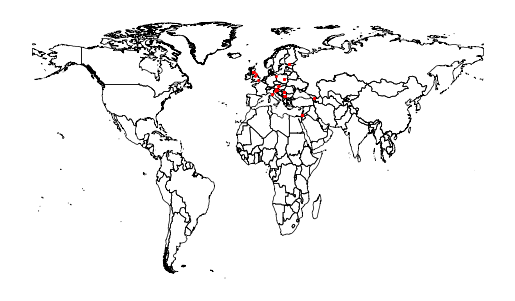

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file( r"C:\Git_Repo\Radical_Project\radmap\radmap\public\data\world-administrative-boundaries_Clean4236.geojson" , crs=4326 )

world.columns = world.columns.str.replace( 'name' , 'NAME' )

add_geo_data = gpd.GeoDataFrame( add_data , geometry=gpd.points_from_xy( add_data.lon , add_data.lat ) , crs=4326 )

fig,ax = plt.subplots()
world.plot( ax=ax , fc='none', ec='black', lw=0.5 )
add_geo_data.plot( ax=ax , fc='red' , markersize=1 )
ax.axis('off');

In [68]:
add_data = add_data.join(
    gpd.sjoin( world[['NAME','geometry']] , add_geo_data , how='inner' , predicate='intersects' )[['uid','NAME']].set_index('uid') , 
    on='uid'
)

add_data.sample( 3 )

,Name of Deradicalization Program,Date,Approach,Agents,Targets,Scale,Links,Country,Region,Address,Image 1,Caption 1,Image 2,Caption 2,Image 3,Caption 3,source,source_2,Event Description,Copyright,lat,lon,uid,NAME
2,Piazza del Mercato Centrale,NaN,NaN,NaN,NaN,NaN,NaN,Italy,Florence,"Piazza del Mercato Centrale, Via dell'Ariento,...",NaN,San Lorenzo Central Market © Il Forchettiere,NaN,NaN,NaN,NaN,deradical,93,"This is the Central Market of Florence, in San...",NaN,43.776398,11.252876,mrdrfmrl,Italy
33,The Tri Institute,Organisation: 2014 / Programme in 2018,To offer women from other cultural backgrounds...,Engaged intercultural knitting community: Esta...,Women with migrant background.,"Based in Škofja Loka, NW Slovenia. Fostering, ...",https://zavod-tri.org/en/,Slovenia,Upper Carniola,"Partizanska cesta 46, 4220 Škofja Loka, Slovenia",NaN,NaN,NaN,NaN,NaN,NaN,deradical,83,NaN,NaN,46.168947,14.308758,wlwcozyr,Slovenia
15,Virtual Becomes Reality,2012,Prevention of digital violence; educational pr...,NaN,NaN,Online,http://virtuelnopostajestvarnost.org/,Serbia,Beograd,"Knez-Miletina 21, Beograd 11000, Serbia",10.0,NaN,11.0,NaN,NaN,NaN,deradical,83,NaN,NaN,44.818899,20.470668,gkrdbxjt,Serbia
